# Seve Martinez 
# DSC-540
# Assignment 2: Supevised learning and classification

## Part 1: Theory

### 1: What is the role of a confusion matrix in the evaluation of a machine trained for a pattern recognition task? In your answer, refer to a concrete example, either from literature or one you created. Anchor you answer in relevant literature.
 
In short, a confusion matrix is a summary of prediction results from a classification problem. It is broken down by class into a table which shows where correct and incorrect predictions are made. By this, it shows where the model was "confused" in classifiying a particular value.
     
The confusion matrix is ideal for multi-class problems because it breaks down predictions by class. Traditional accuracy calculations do not provide the detail necessary to show where the model is having problems.

If we were to simply use an accuracy calculation of:
accuracy = total correct predictions / total predictions made * 100

This would not show us what was misclassified, making it more difficult to accurately tune the model.

An example in code follows.

In [2]:
# Example of a confusion matrix in Python
from sklearn.metrics import confusion_matrix
 
expected = [1, 1, 0, 1, 0, 0, 1, 0, 0, 0]
predicted = [1, 0, 0, 1, 0, 0, 1, 1, 1, 0]
results = confusion_matrix(expected, predicted)
print(results)

[[4 2]
 [1 3]]


The labels are:

Top left: True positive
Top right: false positive
Bottom left: false negative
Bottom right: true negative

Columns show us precision.
Rows show us recall.

Precision is calculated as: 
\\[\frac{TP}{TP+FN}\\]

Recall is calculated as:

\\[\frac{TP}{TP+FP}\\]


Because of the differences in models, we use harmonic mean rather than arithmetic mean to compare models. This is done with an F-measure:

\\[\frac{2*Recall*Precision}{Recall+Precision}\\]

So we can see that boxes 2 and 3 show us where there are errors. In this simple example, there were two values that were labeled positive but weren't and one that was labeled negative but was not. Box 2 is a Type I error, box 3 is a type II error.


The main benefit here over the accuracy prediction is the breakdown of the data. We can clearly see that this shows us where errors are in classficiation and can help us understand if, for example, classes are misrepresented and we need a better dataset.

### 2: What is the role of the ROC curve? How would you use it to compare the performance of several classifiers? In your answer, refer to concrete examples of classifiers, either from literature or one you created. Illustrate the ROC curves and anchor your answer in relevant literature.
 
The Receiver Operating Characteristics (ROC) Area Under the Curve (AUC) is used to determine how well the model is able to distinguish between classes. The scale is from 0 to 1 with 1 being the best and 0 being completely unable to discern. Generally, the higher the number the better.

It is calculated using the True Positive Rate (TPR) and False Positive Rate (FPR). 

TPR: 
\\[\frac{TP}{TP+FN}\\]


Specificity:
\\[\frac{TN}{TN+FP}\\]

FPR:
1 - Specificity

Below is the example from the sci-kit learn website for the ROC method:

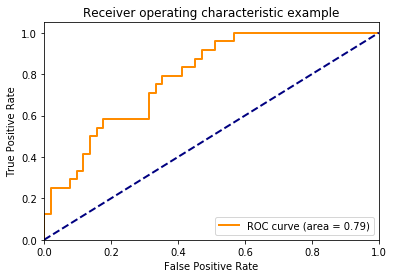

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Here we can see the curve, and an ROC of 0.79 which shows the model strength and distinguishing classes of the iris data set in this example. It can be interpreted as the model has a 79% chance of predicting the correct class.

The distribution threshold overlap will help to determine the strength of the model. If the TN and FP curves are completely independent, then the ROC will equal 1 as the two distributions do not touch whatsoever.

When the distributions overlap some, we introduce type 1 and type 2 errors. The model will continue to struggle as the distributions continue to overlap more and more.

At complete overlap where both distributions are identical, the model will be unable to determine the class and the AUC = 0.5. This will produce all sorts of errors.

Finally, if they are completely opposite, it means the model is classing things incorrectly and the AUC = 0.

The ROC is ideal for two classes. However, if there are three or more, there will need to be N number of comparison graphs. For example with three, there will be one for X and Y, X and Z, and Y and Z and so on.

## Part 2: Application

You are tasked to build an image classifier for the MNIST dataset of handwritten numbers, implementing the k-nearest neighbors (k-NN) algorithm. You will need the following:

    The MNIST dataset, available on multiple servers on the Internet. For example:
        http://yann.lecun.com/exdb/mnist/
        http://www.pymvpa.org/datadb/mnist.html
    The Python package neighbors.KNeighborsClassifier:  https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

The input to your classifier program is an image containing a digit, 0-9. Your program must correctly identify the digit with an accuracy of 95%. Here the outline of your task, but you will have to do a bit of research on your own (and increasingly so throughout the program) to fill in the details:

Familiarize yourself with the MNIST dataset

Familiarize yourself with the k-NN algorithm and its Python implementation in sklearn

Create a Jupyter notebook for this assignment and implement the k-NN algorithm:

- Import the package kNeighborsClassifier.
- Be mindful of the train-test split and set the parameters accordingly (justify your choice).
- Identify the variables in the dataset and define the Euclidean distance between an element in the test set and the training set.
- Calculate the distance between the test element and each of if its k nearest neighbors.
- Count the occurrence of each digit within the k nearest neighbors and identify the most popular digit.
- Identify the test element as the digit voted as most popular in the set of the k nearest neighbors.
- Classify the test element accordingly (i.e. based on the popular vote).
- Calculate the error.


### The k-NN algorithm

k-nearest neighbors is a simple algorithm and uses "lazy learning," meaning that it does not need to be trained on a dataset prior to classification tasks. The simplicity of this model is its attractive trait.

The "K" in the name refers to the number of neighbor points to be considered. If we select a random point and place it on the graph, it will consider k number of points around it and will "vote" on the selected class. 

Choosing a particular k is usually a matter of trial and error. Low k values can be noisy and sensitive to outliers. However large values of k can smooth over key indicators and place too many neighbors into the vote.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier #The utility
from sklearn.metrics import accuracy_score #for scoring
from sklearn.preprocessing import Normalizer # so that we can have unit length vectors

# for reproducibility
np.random.seed(69)

In [5]:
# Let's import the dataset now. Fortunately we can use the MNIST in a convenient csv file for this.
train_df = pd.read_csv('mnist_train.csv')
test_df = pd.read_csv('mnist_test.csv')

In [6]:
# The data has been converted to image data of varying grascale intensity from 0-255.
# Here's an example of the data.

train_df.head()

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


This data has already been split up for us, which was a 59999 train set and 9999 test set. This is the defacto split that was provided in the original data. 

In [7]:
# The first column is the label column. We can see that the digits are labled 0-9.
train_df.iloc[:, 0]

0        0
1        4
2        1
3        9
4        2
        ..
59994    8
59995    3
59996    5
59997    6
59998    8
Name: 5, Length: 59999, dtype: int64

In [8]:
# Typical method displayed here. The label (y) will be moved to it's own data frame and the X_train/test
# dataframes will contain the independent value information. Even though you don't "train" a k-NN algorithm,
# we still need to tell it what is labeled what so that the classes are known to the model.
# Here I use index location to capture the labels column. After that I show that column name can be used as well.

y_train = train_df.iloc[:,0]
X_train = train_df.drop(labels=['5'], axis=1)

y_test = test_df.iloc[:,0]
X_test = test_df.drop(labels=['5'], axis=1)

# normalize the data to unit length
X_train = Normalizer().fit_transform(X_train)
X_test = Normalizer().fit_transform(X_test)


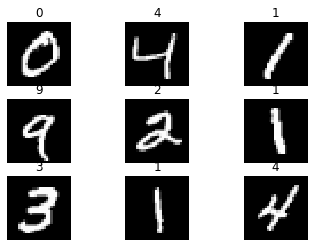

In [9]:
# The original MNIST dataset consists of images of digits in 28x28 format. Since we've got the image data 
# rather than the images, we can use a loop to go through a few of the digit rows and show the digits:


plt.figure # instantiate the figure
for i in range(9):
    plt.subplot(3, 3, i+1) #This will create a 3x3 plot rather than 9 separate plots
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray') # the original values are 28x28
    plt.title(y_train[i])
    plt.axis('off')
plt.show()

The Euclidean distance is as follows:

\\[d(q, p) = \sqrt{\sum_{i=1}^{n}(q_i - p_i)^2}\\]

Which we can write a simple function to calculate distance:

In [10]:
def e_dist(img_q, img_p):
    '''Calculate Euclidean distance between two images'''
    return sum((img_q - img_p) ** 2)

In [17]:
# Here is an example of comparing the first image to the second:
e_dist(X_train[0,:], X_test[0,:])

1.3099656047659864

In [13]:
# Now we will build the classifier.
# The sklearn library has excellent consistency across the model classes so the syntax is easy to remember.
# Because the methods within the class return self, we can build a clean one-liner for the whole thing:

%%time # This isn't the fastest function so let's see how long it takes as well.
kclf = KNeighborsClassifier().fit(X_train, y_train) # default k = 5

CPU times: user 10.9 s, sys: 425 ms, total: 11.3 s
Wall time: 11.5 s


In [14]:
# This takes a *very* long time, probably because this laptop is from the stone age.
%%time
y_hat = kclf.predict(X_test)

In [16]:
# We can now compare the test set to our predictors.

score = accuracy_score(y_test, y_hat)
print(score)

0.9648964896489649


96.4% is an excellent score. We can set up a confusion matrix and look at the result. However, no parameter changes were made, so it's possible that more (or less) predictors can help us to determine the ideal K. Building a simple loop will make this easy.

In [ ]:
# Make a training function
def trainer(x):
    kclf = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    y_hat = kclf.predict(X_test)
    return accuracy = accuracy_score(y_test, preds)
    
    
# List comprehension cus it's cool
y_list = [trainer(i) for i in range(11)]

References:

Brownlee, J. (2020). What is a Confusion Matrix in Machine Learning. Machine Learning Mastery. https://machinelearningmastery.com/confusion-matrix-machine-learning/

Narkhede, S. (2018). Understanding Confusion Matrix. Towards Data Science. https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62

Narkhede, S. (2018). Understanding AUC-ROC Curve. Towards Data Science. https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

